In [2]:

import pandas as pd
import geopandas as gpd
import overturemaps

from shapely import wkb

import osmnx as ox

# 1. Extract data from OSM using osmnx

In [3]:
address = '22, Yosef Haglili, Ramat Gan'
point = ox.geocoder.geocode(address)

## Buildings

In [4]:
blds = ox.geometries_from_point(point, tags={'building':True}, dist=1000)

/var/folders/5p/s8yf3c6n5_1_qnj_m1bgc7x80000gn/T/ipykernel_47633/3412868910.py:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  blds = ox.geometries_from_point(point, tags={'building':True}, dist=1000)


In [5]:
blds.shape

(3465, 80)

In [6]:
blds[["geometry"]].explore( tiles = 'CartoDB positron')

/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


In [7]:
tags = {
    'amenity': ['restaurant', 'cafe', 'school'],  # Including schools
    'shop': True  # Fetch all types of shops
}

### POIS

In [8]:
pois = ox.geometries_from_point(point, tags=tags, dist=1000)

/var/folders/5p/s8yf3c6n5_1_qnj_m1bgc7x80000gn/T/ipykernel_47633/2562225194.py:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_point(point, tags=tags, dist=1000)
/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda

In [9]:
pois = pois.loc['node']

/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


In [10]:
pois.shape

(173, 77)

In [43]:
pois["amenity"].fillna("others").value_counts()

amenity
others        140
cafe           19
restaurant     13
school          1
Name: count, dtype: int64

In [12]:
pois[['amenity',"geometry"]].fillna("others").explore(column='amenity', tiles = 'CartoDB positron', cmap='Set1', markersize=10)

/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/

# Extract data from overturemaps

## Generate bbox from buildings dataset for overturemaps

In [13]:
bbox = blds.dissolve().bounds

/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


In [14]:
bbox.iloc[0].values

array([34.8081242, 32.0800019, 34.8309439, 32.0985663])

In [15]:
bbox.iloc[0].values.tolist()

[34.8081242, 32.0800019, 34.8309439, 32.0985663]

## Download buildings and pois from overturemaps

### Buildings

In [16]:
table_bld = overturemaps.record_batch_reader("building", bbox.iloc[0].values.tolist()).read_all()
table_bld = table_bld.combine_chunks()

In [17]:
df = table_bld.to_pandas()


In [18]:
df["sources"].apply(lambda x: x[0]['dataset']).value_counts()

sources
OpenStreetMap             3777
Microsoft ML Buildings     306
Name: count, dtype: int64

In [19]:
df["dataset_source"] = df["sources"].apply(lambda x: x[0]['dataset'])

In [20]:
gdf_buildings = gpd.GeoDataFrame(
    df,
    geometry=df['geometry'].apply(wkb.loads),
    crs="EPSG:4326"
)

In [21]:
gdf_buildings[["geometry","dataset_source"]].explore(column = "dataset_source", cmap='Set1', tiles = 'CartoDB positron')

/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/

### Conclusion: Overture includes all OSM buildings plus Microsoft buildings detected based on satellite images. Result: Overture is more complete 

### Pois

In [22]:
table_pois = overturemaps.record_batch_reader("place", bbox.iloc[0].values.tolist()).read_all()
table_pois = table_pois.combine_chunks()

In [23]:
df_pois = table_pois.to_pandas()

In [24]:
df_pois["sources"].apply(lambda x: x[0]['dataset']).value_counts()

sources
meta    1261
msft      27
Name: count, dtype: int64

MSFT: microsoft footprint

In [25]:
gdf_pois = gpd.GeoDataFrame(
    df_pois,
    geometry=df_pois['geometry'].apply(wkb.loads),
    crs="EPSG:4326"
)

In [26]:
gdf_pois[["geometry"]].explore( tiles = 'CartoDB positron')

/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


### Lets explore available information on POIS

In [27]:
gdf_pois.iloc[0]

id                             08f2db0cce7a27a403078fe91848089c
geometry                              POINT (34.80934 32.08007)
bbox          {'xmin': 34.8093376159668, 'xmax': 34.80934143...
version                                                       0
sources       [{'property': '', 'dataset': 'meta', 'record_i...
names         {'primary': 'Hasmonean school', 'common': None...
categories    {'primary': 'elementary_school', 'alternate': ...
confidence                                              0.54162
websites                      [https://hashmonaim.tik-tak.net/]
socials              [https://www.facebook.com/106484585631153]
emails                                                     None
phones                                                     None
brand                                                      None
addresses     [{'freeform': 'החשמונאים 33', 'locality': 'רמת...
Name: 0, dtype: object

In [28]:
gdf_pois.iloc[0]["sources"]

array([{'property': '', 'dataset': 'meta', 'record_id': '106484585631153', 'update_time': '2024-08-02T00:00:00.000Z', 'confidence': None}],
      dtype=object)

In [29]:
gdf_pois.iloc[0]["categories"]

{'primary': 'elementary_school', 'alternate': None}

In [30]:
type(gdf_pois.iloc[0]["categories"])

dict

### Extract categories

In [31]:
df_categories = pd.json_normalize(gdf_pois["categories"])

In [32]:
gdf_pois = pd.concat([gdf_pois.drop('categories',axis=1),df_categories], axis=1)

/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


In [33]:
gdf_pois

/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


id                   geometry  \
0     08f2db0cce7a27a403078fe91848089c  POINT (34.80934 32.08007)   
1     08f2db0cce6a0d1d03adc8b41f4ee7e6  POINT (34.81269 32.08006)   
2     08f2db0cce68ea8d03a5c955047c63ba  POINT (34.81518 32.08001)   
3     08f2db0cce68ea8d03e67963abe8d6d7  POINT (34.81518 32.08001)   
4     08f2db0cce7a6da20384827e694729a3  POINT (34.80844 32.08011)   
...                                ...                        ...   
1283  08f2db0cc86a44c3035a32901c94a067  POINT (34.82930 32.09856)   
1284  08f2db0cc86b104403b21fc557c1c268  POINT (34.83022 32.09784)   
1285  08f2db0cc868616203e49b0b96ee08d2  POINT (34.83069 32.09778)   
1286  08f2db0cc8696a46033abec3a365e52e  POINT (34.83085 32.09667)   
1287  08f2db0cc8684c5503f8f5c676450afa  POINT (34.83039 32.09810)   

                                                   bbox  version  \
0     {'xmin': 34.8093376159668, 'xmax': 34.80934143...        0   
1     {'xmin': 34.812686920166016, 'xmax': 34.812690...        0   
2     {'xmin': 34.8151741027832, 'xmax': 34.81518173...        0   
3     {'xmin': 34.8151741027832, 'xmax': 34.81518173...        0   
4     {'xmin': 34.80843734741211, 'xmax': 34.8084411...        0   
...                                                 ...      ...   
1283  {'xmin': 34.82929992675781, 'xmax': 34.8293037...        0   
1284  {'xmin': 34.83021926879883, 'xmax': 34.8302230...        0   
1285  {'xmin': 34.830684661865234, 'xmax': 34.830688...        0   
1286  {'xmin': 34.830848693847656, 'xmax': 34.830852...        0   
1287  {'xmin': 34.83039093017578, 'xmax': 34.8303947...        0   

                                                sources  \
0     [{'property': '', 'dataset': 'meta', 'record_i...   
1     [{'property': '', 'dataset': 'meta', 'record_i...   
2     [{'property': '', 'dataset': 'meta', 'record_i...   
3     [{'property': '', 'dataset': 'meta', 'record_i...   
4     [{'property': '', 'dataset': 'meta', 'record_i...   
...                                                 ...   
1283  [{'property': '', 'dataset': 'meta', 'record_i...   
1284  [{'property': '', 'dataset': 'meta', 'record_i...   
1285  [{'property': '', 'dataset': 'meta', 'record_i...   
1286  [{'property': '', 'dataset': 'meta', 'record_i...   
1287  [{'property': '', 'dataset': 'meta', 'record_i...   

                                                  names  confidence  \
0     {'primary': 'Hasmonean school', 'common': None...    0.541620   
1     {'primary': 'Electrockrat - Music Productions ...    0.860055   
2     {'primary': 'Fit Step Pro המרכז האורטופדי', 'c...    0.451060   
3     {'primary': 'חומוס האחים', 'common': None, 'ru...    0.860055   
4     {'primary': 'עדי מגד - תזונאי קליני מומחה', 'c...    0.310616   
...                                                 ...         ...   
1283  {'primary': 'פלסקוליין בע''מ', 'common': None,...    0.451060   
1284  {'primary': 'מוסך מרום ארגמן', 'common': None,...    0.860055   
1285  {'primary': 'משכן הארועים הדודאים', 'common': ...    0.451060   
1286  {'primary': 'dayn_israel', 'common': None, 'ru...    0.451060   
1287  {'primary': 'אספרגוס דליקאטעסאן', 'common': No...    0.672152   

                                              websites  \
0                    [https://hashmonaim.tik-tak.net/]   
1                     [https://bit.ly/electrockrat-mp]   
2                                                 None   
3                                                 None   
4                         [http://www.megediet.co.il/]   
...                                                ...   
1283                         [http://plascoline.co.il]   
1284                                              None   
1285                       [http://www.hadudaim.co.il]   
1286              [https://linktr.ee/coachisraeldayan]   
1287  [https://asparagusdeli.co.il/menu-delicatessen/]   

                                          socials emails           phones  \
0      [https://www.facebook.com/106484585631153]   No

### Categories with frequency bigger than 10

<Axes: xlabel='primary'>

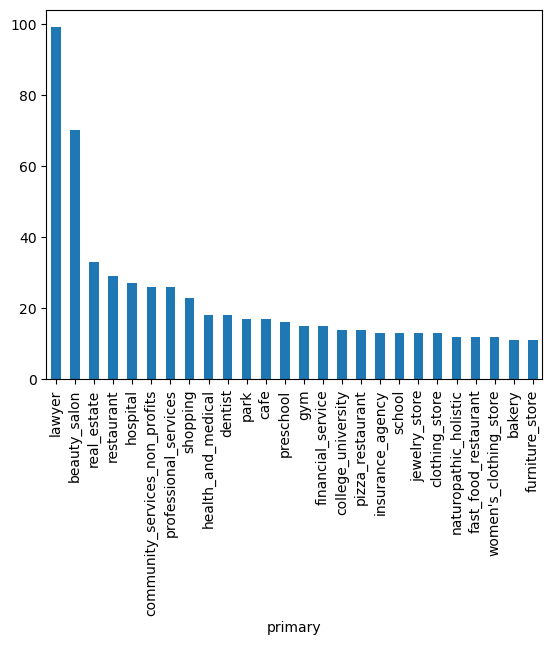

In [65]:
gdf_pois.primary.value_counts()[gdf_pois.primary.value_counts()>10].plot(kind="bar")

### Extract sources

In [66]:
gdf_pois['datasets']=gdf_pois["sources"].apply(lambda x: None if len(x)<1 else set([v['dataset'] for v in x]) )

In [67]:
gdf_pois['datasets'].value_counts()

datasets
{meta}          1260
{msft}            22
{meta, msft}       6
Name: count, dtype: int64

## Comparison of some categories from OSM and Overture

### Cafe and restaurants

In [39]:
gdf_pois[(gdf_pois.primary=='cafe')|(gdf_pois.primary=='restaurant')][["primary","geometry"]].shape

/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


(46, 2)

#### Prepare names for map

In [58]:
gdf_pois["name"] =gdf_pois["names"].apply(lambda x: x['primary'] )

In [64]:
pois["name_ok"] = pois[["name:en","name"]].apply(lambda r: r["name:en"] if pd.isnull(r["name:en"])==False else r["name"], axis=1)

/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


In [69]:
import folium
import geopandas as gpd

# Create a Folium map centered at a location (change the coordinates as needed)
m = folium.Map(location=[ 32.0800019,34.8081242], zoom_start=12, tiles = 'CartoDB positron')

# Layer 1: Cafes and Restaurants from gdf_pois
fg_cafes_restaurants = folium.FeatureGroup(name="Cafes and Restaurants from Overture")

# Add points as CircleMarker instead of Marker
for _, row in gdf_pois[(gdf_pois.primary == 'cafe') | (gdf_pois.primary == 'restaurant')][["primary", "geometry","name"]].iterrows():
    folium.CircleMarker(
        location=[row['geometry'].y, row['geometry'].x],
        radius=4,  # size of the circle
        color='blue',  # set color based on type
        fill=True,
        fill_opacity=1,
        popup=row[['primary',"name"]]
    ).add_to(fg_cafes_restaurants)

# Add cafes and restaurants layer to the map
fg_cafes_restaurants.add_to(m)

# Layer 2: Amenities from pois
fg_amenities = folium.FeatureGroup(name="Cafes and Restaurants from OSM")

# Add points as CircleMarker for amenities
for _, row in pois[(pois.amenity == 'cafe') | (pois.amenity == 'restaurant')][["amenity", "geometry","name_ok"]].iterrows():
    folium.CircleMarker(
        location=[row['geometry'].y, row['geometry'].x],
        radius=3,  # size of the circle
        color='red',  # set a different color for amenities
        fill=True,
        fill_opacity=0.5,
        popup=row[['amenity',"name_ok"]]
    ).add_to(fg_amenities)

# Add amenities layer to the map
fg_amenities.add_to(m)

# Add Layer Control to toggle between layers
folium.LayerControl().add_to(m)

# Save or display the map
m.save('map_with_circle_layers.html')

# Display the map in the notebook (if using Jupyter Notebook)
m


/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


### Schools

##### Almost none of the state schools is included into the dataset. The reason is that they don't have their facebook pages!

##### However results from OSM are even more dissappointing :(

In [73]:
gdf_pois[(gdf_pois.primary=='school')][["geometry","name"]].explore(color='red', tiles = 'CartoDB positron')

/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/

In [74]:
pois[(pois.amenity=='school')][["geometry","name"]].explore(color='red', tiles = 'CartoDB positron')

/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/overture2/lib/python3.9/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/homebrew/anaconda3/